In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/Users/jinli/Downloads/bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df['conversion']=df['y'].apply(lambda x : 1 if x== 'yes' else 0 )
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [13]:
#1.Aggregate Conversion Rate
Conversion_Rate=df.conversion.sum()/df.shape[0]
print (df.conversion.sum(),df.shape[0],Conversion_Rate)

4640 41188 0.11265417111780131


In [18]:
#2. Conversion Rates by number of contactes
pd.DataFrame(df.groupby(by='campaign')['conversion'].sum())

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [19]:
pd.DataFrame(df.groupby(by='campaign')['conversion'].count())

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [30]:
conversion_by_contact=pd.DataFrame(df.groupby(by='campaign')['conversion'].sum()/df.groupby(by='campaign')['conversion'].count())* 100.0
conversion_by_contact

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
5,7.504690
6,7.660878
7,6.041335
8,4.250000
9,6.007067


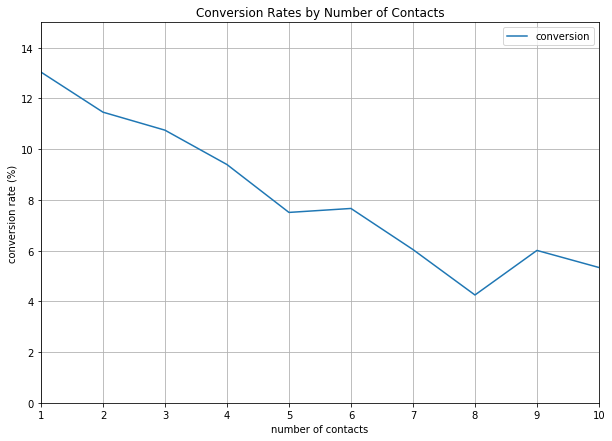

In [29]:

ax = conversion_by_contact[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversion_by_contact.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [23]:
ax= conversion_by_contact.plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversion_by_contact.index[:10],
    title='Conversion Rates by Number of Contacts')

0        telephone
1        telephone
2        telephone
3        telephone
4        telephone
           ...    
41183     cellular
41184     cellular
41185     cellular
41186     cellular
41187     cellular
Name: contact, Length: 41188, dtype: object

In [31]:
#3. Conversion Rates by Age

In [32]:
pd.DataFrame(df.groupby(by='age')['conversion'].sum())


,conversion
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


In [33]:
pd.DataFrame(df.groupby(by='age')['conversion'].count())

,conversion
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [36]:
conversions_by_age = df.groupby(
    by='age'
)['conversion'].sum() / df.groupby(
    by='age'
)['conversion'].count() * 100.0
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


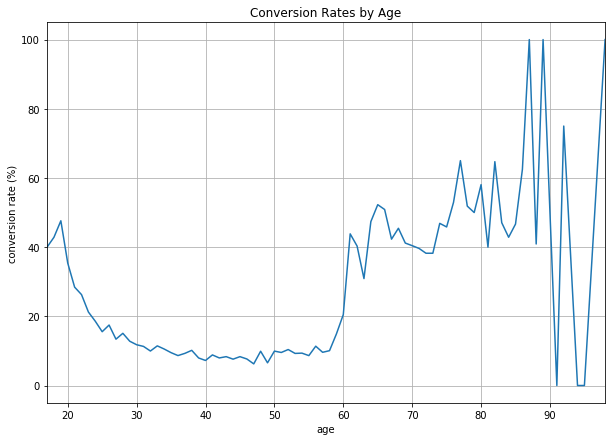

In [40]:
ax = conversions_by_age.plot(
   
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [44]:
#age group
df['agegroup']=df['age'].apply(lambda x:'(18,30]' if x<30 else 
                         '[30,40)' if x<40 else
                         '[40,50)' if x<50 else
                         '[50,60)' if x<60 else
                         '[60,70)' if x<70 else 
                         '70+' )

In [46]:
pd.DataFrame(df.groupby(by=df['agegroup'])['conversion'].sum()
            )

,conversion
agegroup,
"(18,30]",922
70+,221
"[30,40)",1715
"[40,50)",834
"[50,60)",697
"[60,70)",251


In [47]:
pd.DataFrame(df.groupby(by=df['agegroup'])['conversion'].count()
            )

,conversion
agegroup,
"(18,30]",5669
70+,469
"[30,40)",16938
"[40,50)",10526
"[50,60)",6862
"[60,70)",724


In [48]:
conversions_by_agegroup = pd.DataFrame(df.groupby(by=df['agegroup'])['conversion'].sum()
            ) / pd.DataFrame(df.groupby(by=df['agegroup'])['conversion'].count()
            ) * 100.0
pd.DataFrame(conversions_by_agegroup)

,conversion
agegroup,
"(18,30]",16.263891
70+,47.121535
"[30,40)",10.125162
"[40,50)",7.923238
"[50,60)",10.157389
"[60,70)",34.668508


Text(0, 0.5, 'conversion rate (%)')

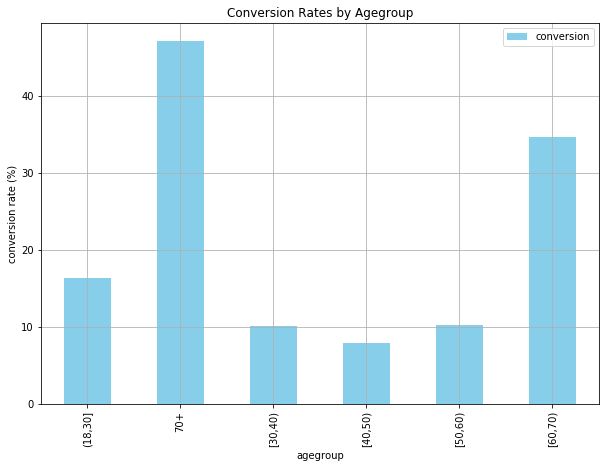

In [53]:
ax=conversions_by_agegroup.plot(
    grid=True,
    figsize=(10, 7),
    kind='bar',
    color='skyblue',                          
    title='Conversion Rates by Agegroup')
ax.set_xlabel('agegroup')
ax.set_ylabel('conversion rate (%)')

In [54]:
#4. Conversions vs. Non-Conversions

In [58]:
conversions_by_marital_status_df = pd.pivot_table(df,values='y',index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [65]:
conversions_by_marital_status_df.columns=['non conversed','conversed']

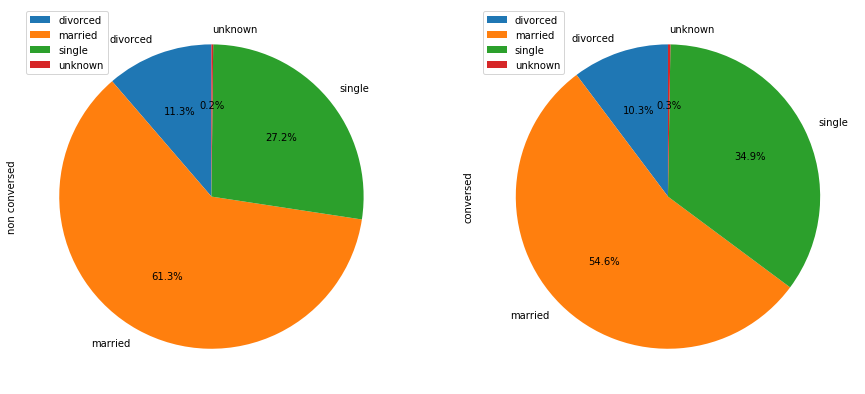

In [66]:

conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()


In [69]:
#5. Conversions by Age Groups & Marital Status

In [70]:

age_marital_df = df.groupby(['agegroup', 'marital'])['conversion'].sum().unstac('marital').fillna(0)

In [71]:
age_marital_df = age_marital_df.divide(
    df.groupby(
        by='agegroup'
    )['conversion'].count(), 
    axis=0
)

age_marital_df

marital,divorced,married,single,unknown
agegroup,,,,
"(18,30]",0.002117,0.027871,0.132475,0.000176
70+,0.136461,0.321962,0.012793,0.000000
"[30,40)",0.007557,0.052958,0.040383,0.000354
"[40,50)",0.011970,0.054627,0.012350,0.000285
"[50,60)",0.017342,0.077674,0.006412,0.000146
"[60,70)",0.037293,0.301105,0.006906,0.001381


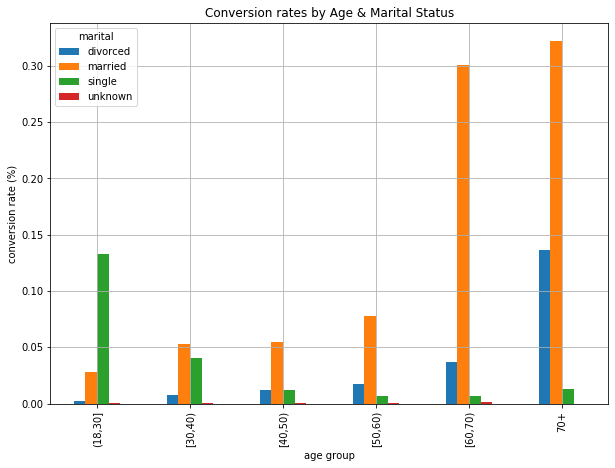

In [85]:

ax = age_marital_df.loc[
    ['(18,30]', '[30,40)', '[40,50)', '[50,60)', '[60,70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

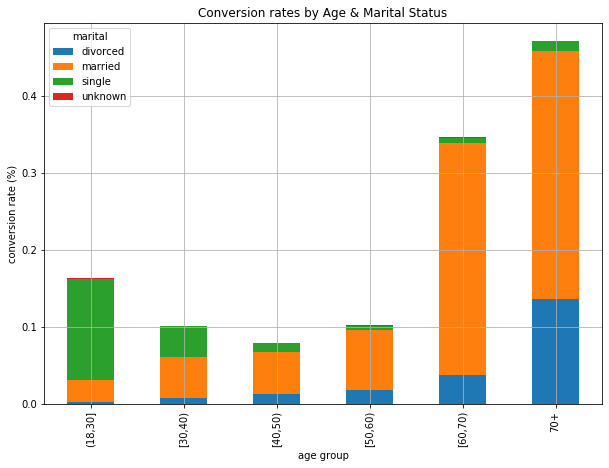

In [87]:

ax = age_marital_df.loc[
   ['(18,30]', '[30,40)', '[40,50)', '[50,60)', '[60,70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()